First few rows of the dataset:
   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   Unite

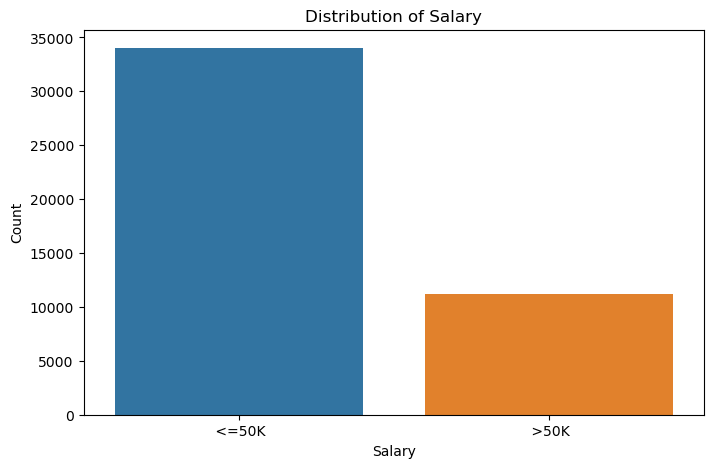

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


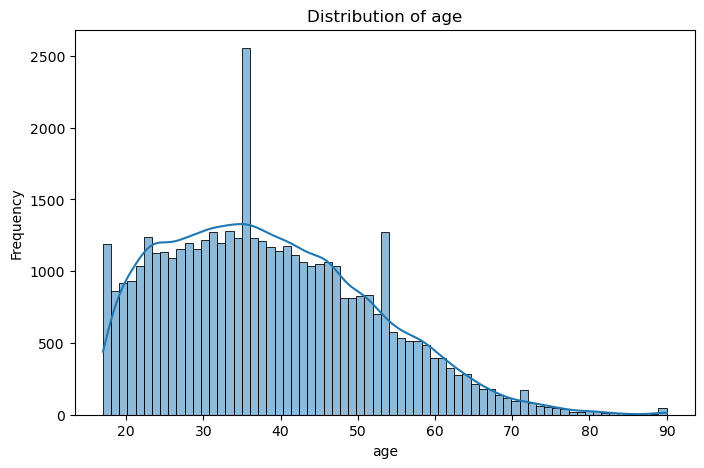

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


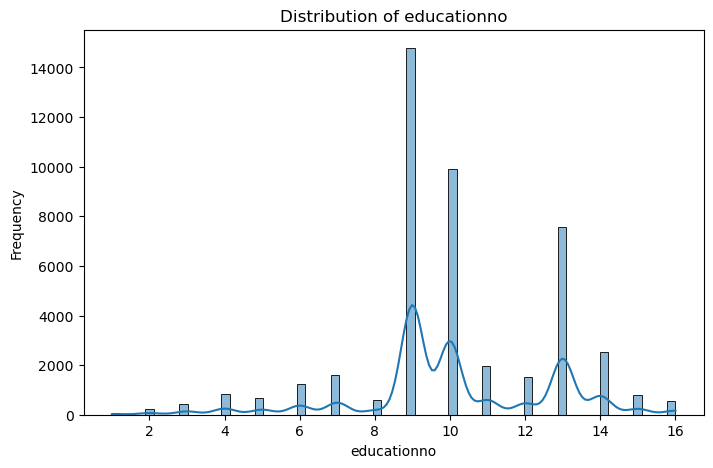

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


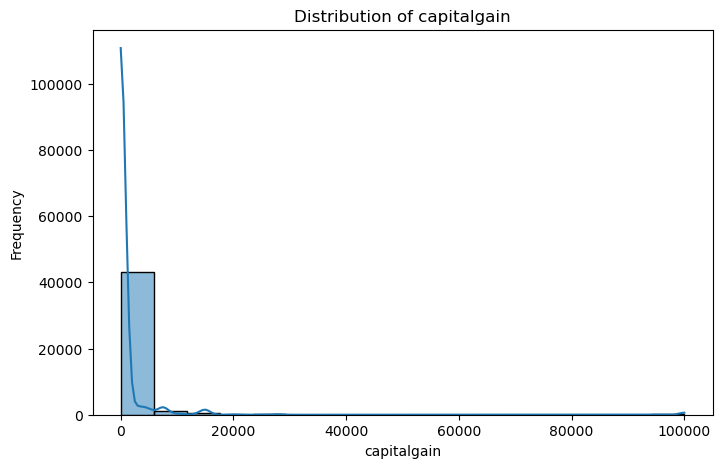

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


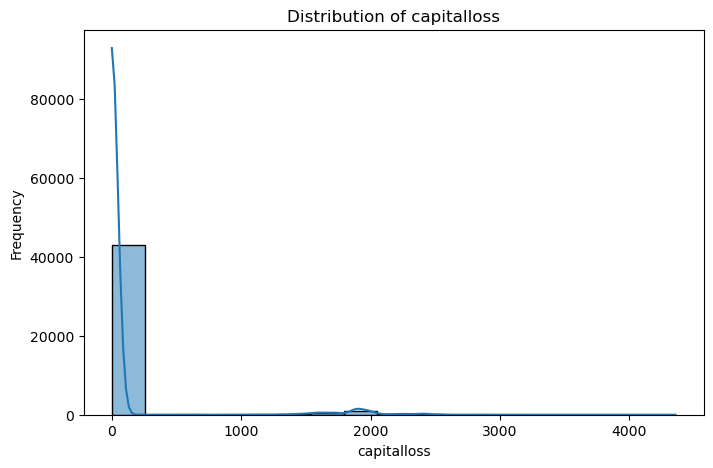

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


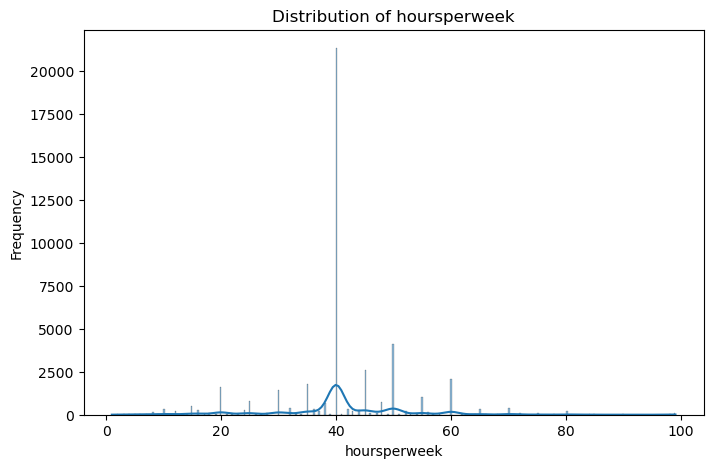

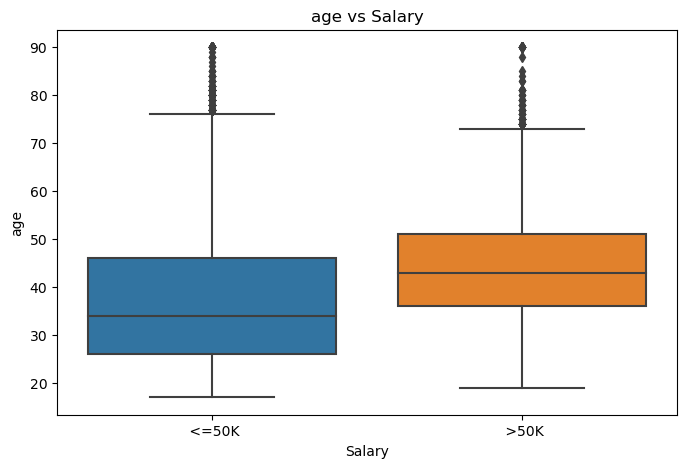

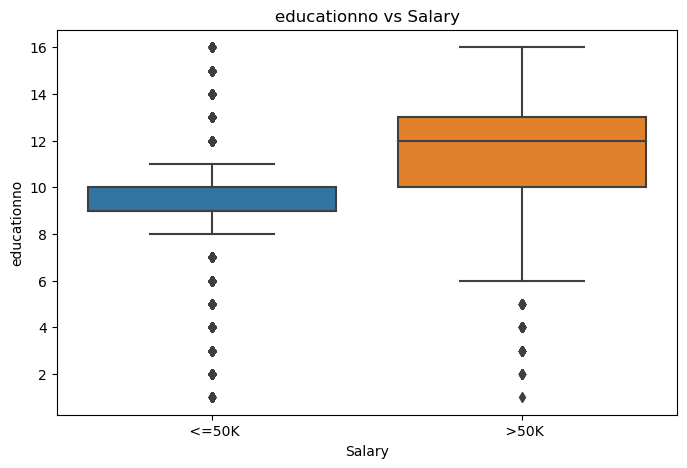

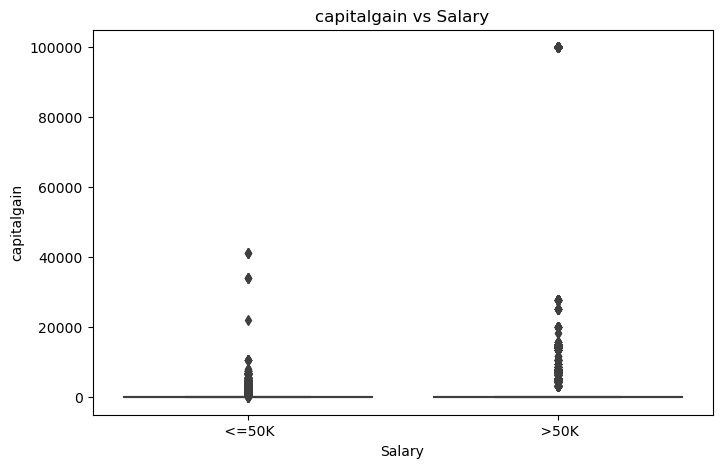

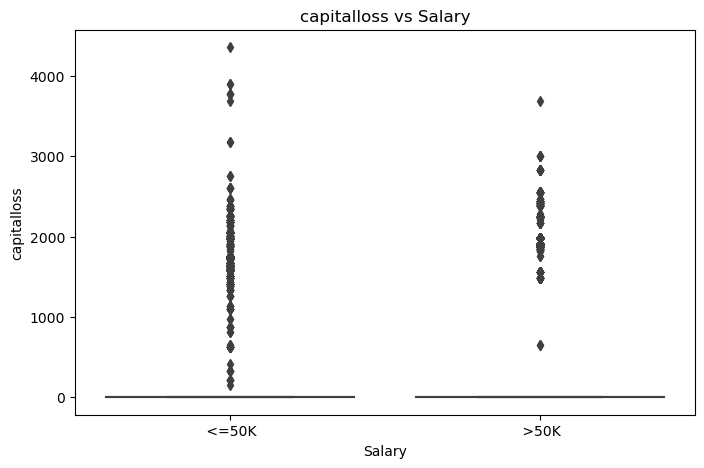

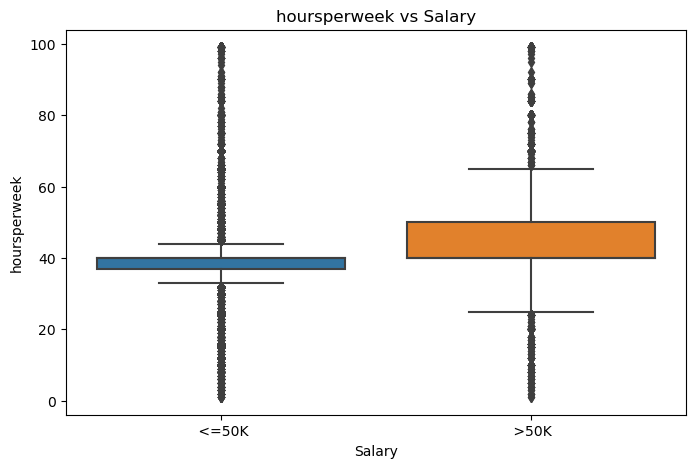

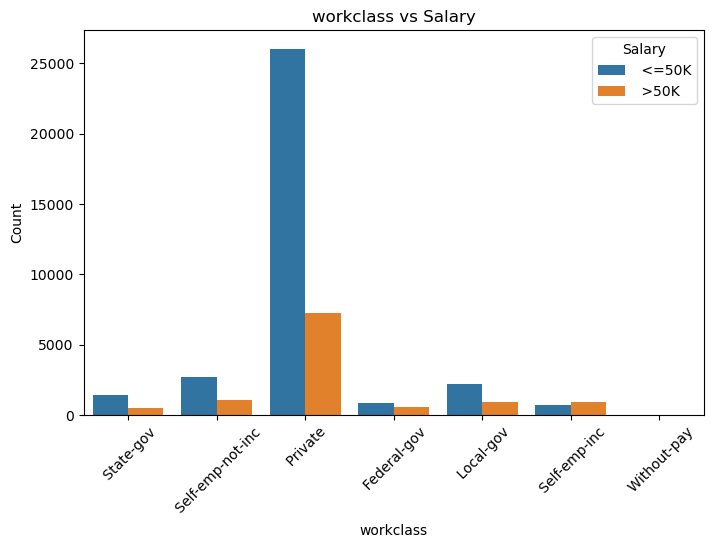

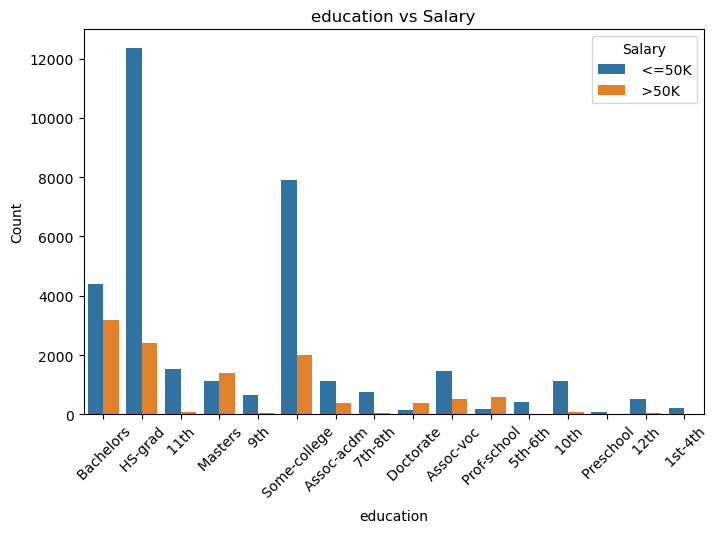

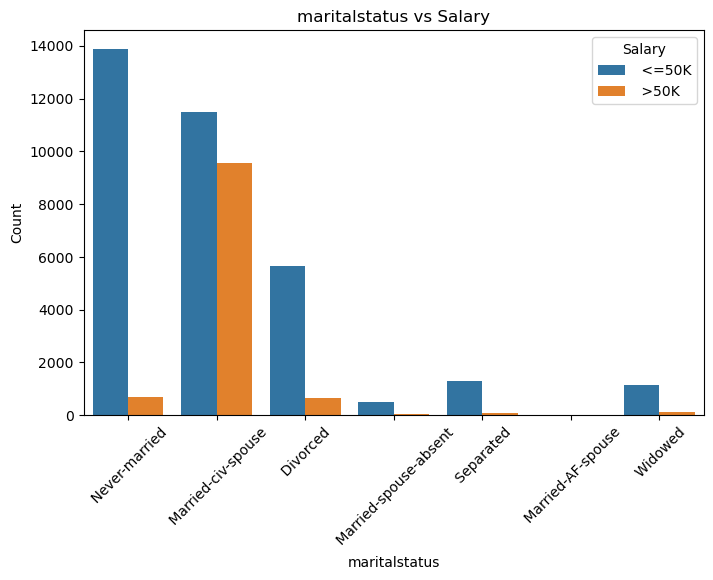

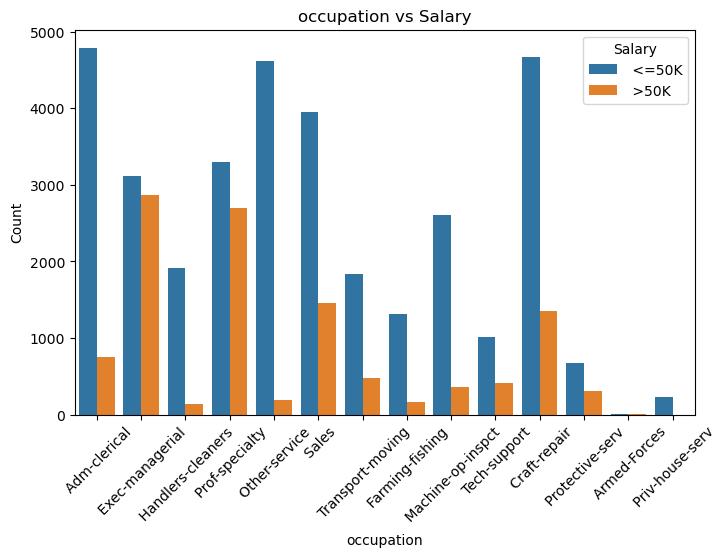

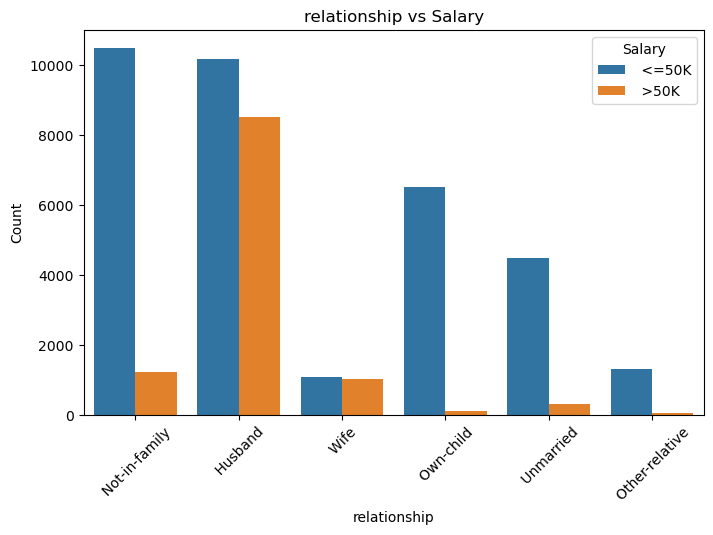

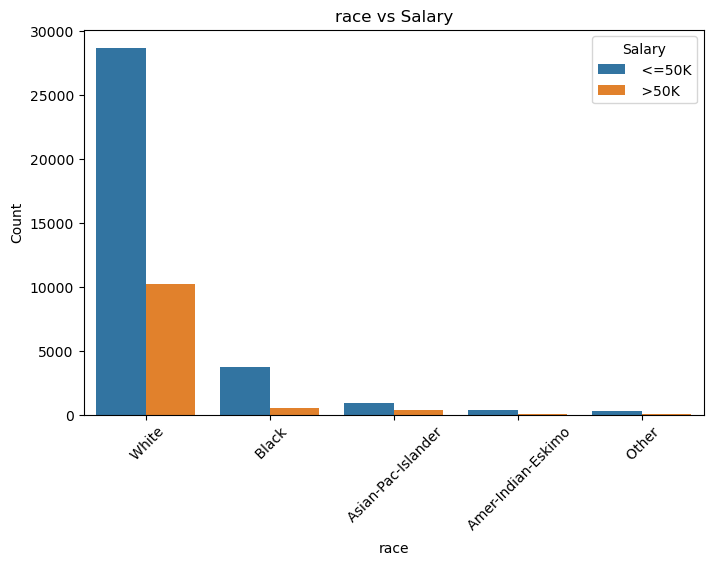

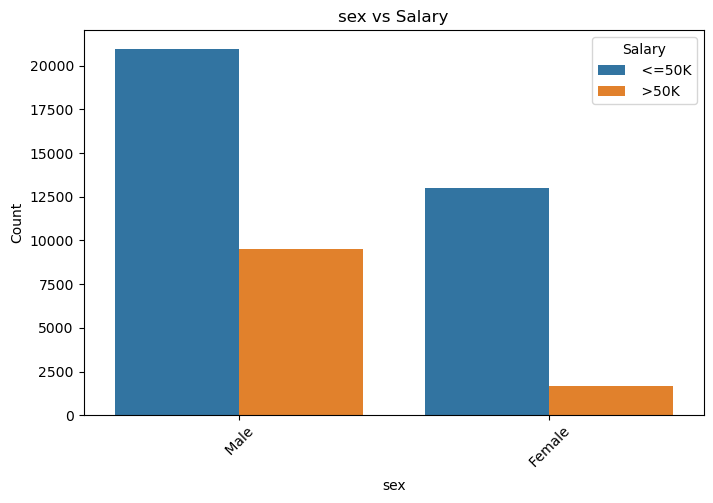

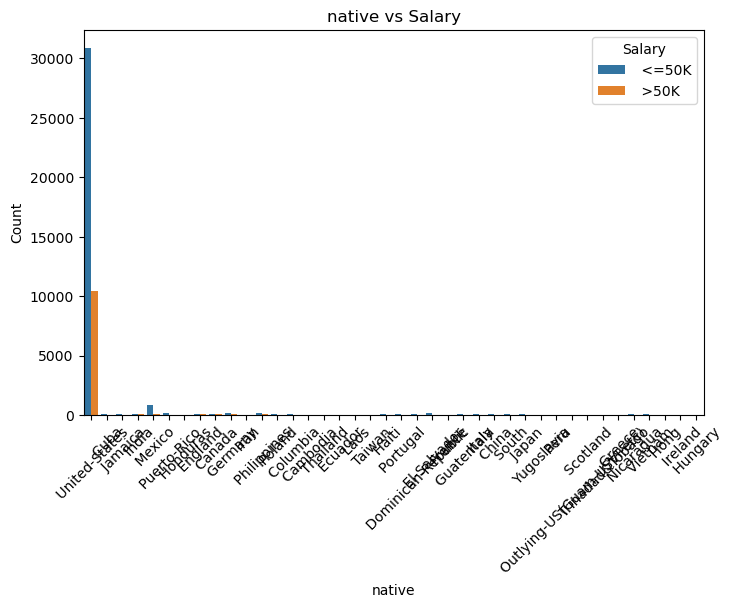

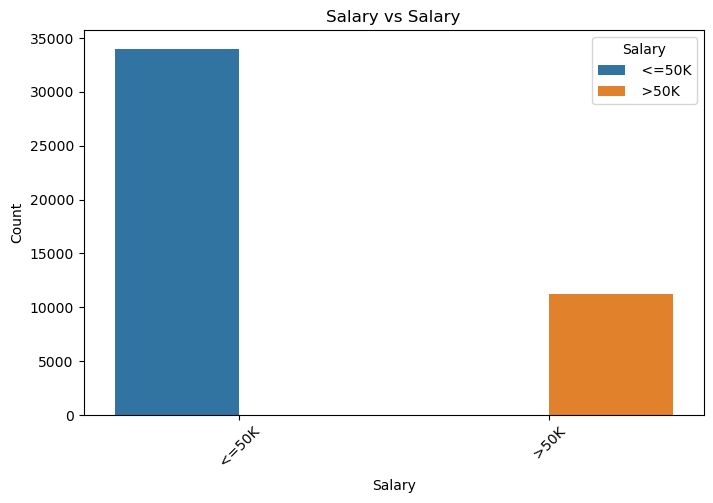

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


df_train = pd.read_csv("C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\support vector machine\SalaryData_Train(1).csv")
df_test = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\support vector machine\SalaryData_Test(1).csv")


df = pd.concat([df_train, df_test])


print("First few rows of the dataset:")
print(df.head())


print("\nSummary statistics of numerical features:")
print(df.describe())


print("\nMissing values:")
print(df.isnull().sum())


print("\nData types:")
print(df.dtypes)


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Salary')
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


numerical_features = df.select_dtypes(include=['int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Salary', y=feature)
    plt.title(f"{feature} vs Salary")
    plt.xlabel("Salary")
    plt.ylabel(feature)
    plt.show()


categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='Salary')
    plt.title(f"{feature} vs Salary")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Salary', loc='upper right')
    plt.show()


label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


X = df.drop(columns=['Salary'])
y = df['Salary']


param_grid = {'C': [0.1, 1, 10, 100]}
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)

print("\nBest hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
